In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [101]:
k = 230
c = 897
den = 2700
alfa = k/(c*den)

# Discretização da malha em x [cm]
dx = 0.1
dy = 0.1
# Discretização no tempo [s]
dt = 0.1#dx**2 / (4*alfa)

# Comprimento da barra [cm]
Lx = 0.4
Ly = 0.4

# Número de passos []
nt = 500000
print(dt)

0.1


In [102]:
tt = dt*nt

# Número de nós []
nx = int(Lx/dx)+1
ny = int(Ly/dy)+1

In [103]:
T = np.zeros(shape=(ny,nx,nt))

In [104]:
#%% Condição de contorno
T[ny-1, : , : ] = 0
T[0,:,:] = 200
T[:,0,:] = 150
T[:,nx-1,:] = 50

In [105]:
print(T[:,:,0])

[[150. 200. 200. 200.  50.]
 [150.   0.   0.   0.  50.]
 [150.   0.   0.   0.  50.]
 [150.   0.   0.   0.  50.]
 [150.   0.   0.   0.  50.]]


In [106]:
#%% Tolerancia []
tol = 1e-8

#%% Cálculos no tempo
for p in range(0,nt-1):
    for n in range(1,nx-1):
        for m in range(1,ny-1):
    
            T[m,n,p+1] = T[m,n,p] + (alfa*dt/dx**2) * (T[m,n+1,p] + T[m,n-1,p] + T[m+1,n,p] + T[m-1,n,p] - 4 *T[m,n,p])
               
    erro = np.amax(abs((T[1:nx-1,1:ny-1,p]-T[1:nx-1,1:ny-1,p-1])/T[1:nx-1,1:ny-1,p]))
    if tol>=erro:
        
        print('Convergiu!',p)
        break

C:\Users\bru_b\AppData\Local\Temp/ipykernel_10380/1635921966.py:11: RuntimeWarning: invalid value encountered in true_divide
  erro = np.amax(abs((T[1:nx-1,1:ny-1,p]-T[1:nx-1,1:ny-1,p-1])/T[1:nx-1,1:ny-1,p]))


Convergiu! 10969


[[150.         200.         200.         200.          50.        ]
 [150.         153.57106607 142.8566302  117.85678036  50.        ]
 [150.         121.42805877  99.999275    78.57091592  50.        ]
 [150.          82.14249464  57.14234449  46.42820893  50.        ]
 [150.           0.           0.           0.          50.        ]]
50000.0


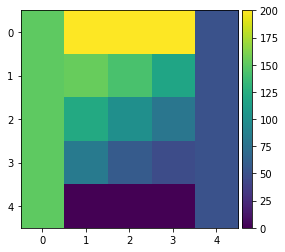

In [107]:
#%% Gráfico para a temperatura
ax = plt.subplot(111)
im = ax.imshow(T[:,:,p])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
print(T[:,:,p])
print(tt)

In [108]:
print(T[int(ny/2),int(nx/2),p])

99.99927499609325
